In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 데이터 불러오기
titanic_df = pd.read_csv('./data/Titanic_data.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


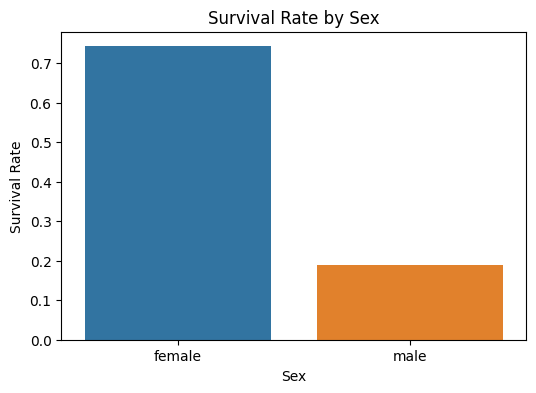

In [5]:
# 성별에 따른 생존률 계산
survived_by_sex = titanic_df.groupby('Sex')['Survived'].mean()

# 막대 그래프로 시각화
plt.figure(figsize=(6,4))
sns.barplot(x=survived_by_sex.index, y=survived_by_sex.values)
plt.title("Survival Rate by Sex")
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

Embarked
C     93
Q     30
S    217
Name: Survived, dtype: int64 Embarked
C     75
Q     47
S    427
Name: Survived, dtype: int64


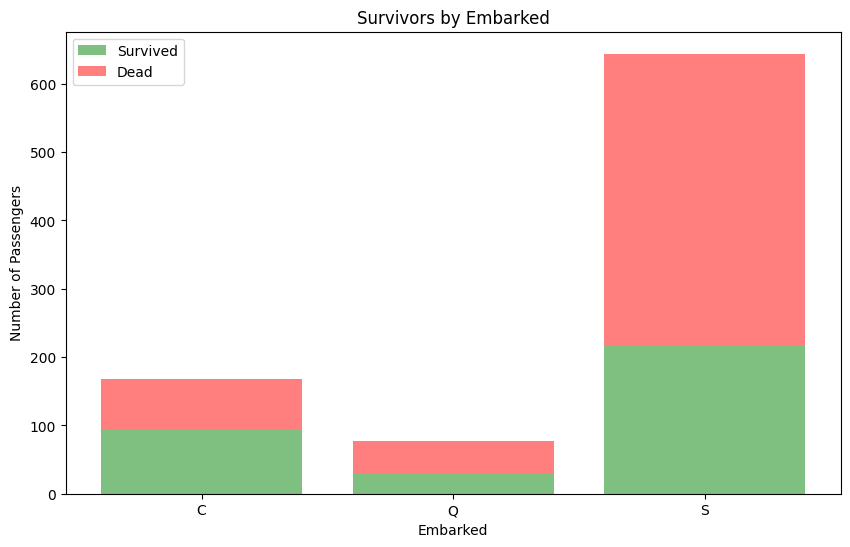

In [6]:
# 탑승 항구에 따른 생존자 수
survived_embarked = titanic_df.groupby('Embarked')['Survived'].sum()
dead_embarked = titanic_df.groupby('Embarked')['Survived'].count() - survived_embarked
print(survived_embarked, dead_embarked)

# 그래프 그리기
plt.figure(figsize=(10,6))
plt.bar(survived_embarked.index, survived_embarked.values, color='g', alpha=0.5, label='Survived')
plt.bar(dead_embarked.index, dead_embarked.values, bottom=survived_embarked.values, color='r', alpha=0.5, label='Dead')
plt.title('Survivors by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

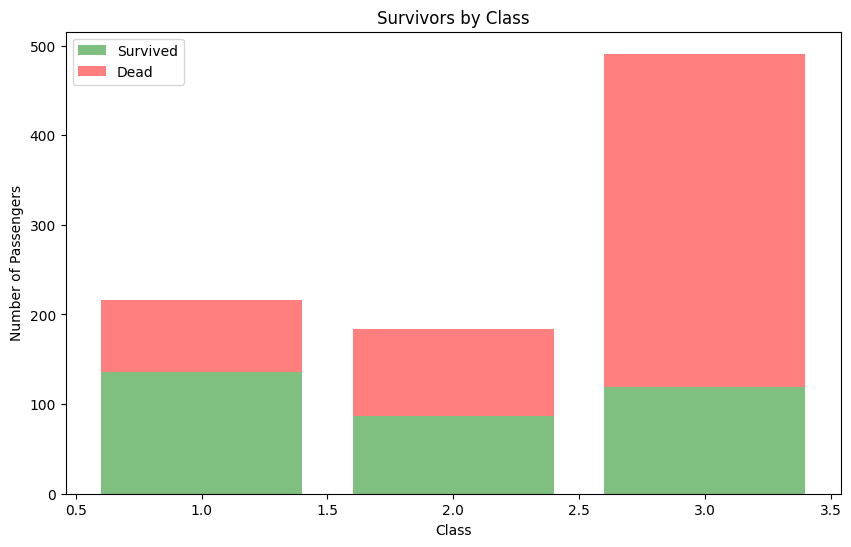

In [7]:
# 객실 등급에 따른 생존자 수
survived_class = titanic_df.groupby('Pclass')['Survived'].sum()
dead_class = titanic_df.groupby('Pclass')['Survived'].count() - survived_class

# 그래프 그리기
plt.figure(figsize=(10,6))
plt.bar(survived_class.index, survived_class.values, color='g', alpha=0.5, label='Survived')
plt.bar(dead_class.index, dead_class.values, bottom=survived_class.values, color='r', alpha=0.5, label='Dead')
plt.title('Survivors by Class')
plt.xlabel('Class')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()